# **LOADING DATASET**

In [ ]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/diabetes_dataset.csv")
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,age_category,bmi_category,blood_glucose_level_category,smoking_binary,age_hypertension_interaction,bmi_squared,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,Senior,Overweight,Diabetic,0,0.0,634.5361,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,Adult,Overweight,Normal,1,0.0,746.3824,0
2,Male,28.0,0,0,never,27.32,5.7,158,Middle Age,Overweight,Diabetic,0,0.0,746.3824,0
3,Female,36.0,0,0,current,23.45,5.0,155,Middle Age,Normal,Diabetic,1,0.0,549.9025,0
4,Male,76.0,1,1,current,20.14,4.8,155,Senior,Normal,Diabetic,1,76.0,405.6196,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,Senior,Overweight,Normal,1,0.0,746.3824,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,Young,Underweight,Prediabetic,1,0.0,301.7169,0
99997,Male,66.0,0,0,former,27.83,5.7,155,Senior,Overweight,Diabetic,1,0.0,774.5089,0
99998,Female,24.0,0,0,never,35.42,4.0,100,Middle Age,Obese,Prediabetic,0,0.0,1254.5764,0


# **EXPLORATORY DATA ANALYSIS**

In [ ]:
# Display descriptive statistics
print("Descriptive Statistics:")
df.describe()

Descriptive Statistics:


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,smoking_binary,age_hypertension_interaction,bmi_squared,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.64905,4.623410,790.470769,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.47727,16.684722,419.007821,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.00000,0.000000,100.200100,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.00000,0.000000,558.376900,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,1.00000,0.000000,746.382400,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,1.00000,0.000000,874.976400,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.00000,80.000000,9156.576100,1.000000


In [ ]:

# Count the occurrences of each value in the 'diabetes' column
diabetes_counts = df['diabetes'].value_counts()

# Print the counts
print(diabetes_counts)

diabetes
0    91500
1     8500
Name: count, dtype: int64


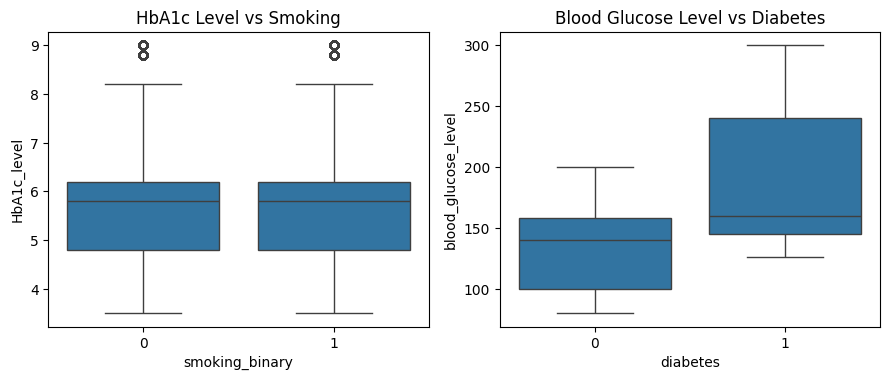

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the box plots
plt.figure(figsize=(9, 7))

plt.subplot(2, 2, 3)
sns.boxplot(x='smoking_binary', y='HbA1c_level', data=df)
plt.title('HbA1c Level vs Smoking')

plt.subplot(2, 2, 4)
sns.boxplot(x='diabetes', y='blood_glucose_level', data=df)
plt.title('Blood Glucose Level vs Diabetes')

plt.tight_layout()
plt.show()


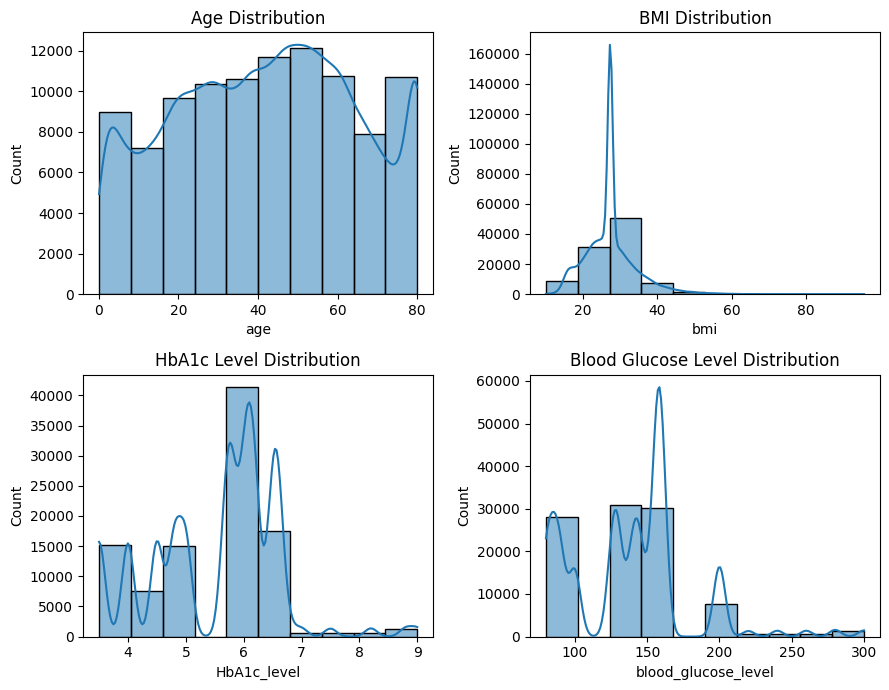

In [ ]:
# Visualize the distribution of features
plt.figure(figsize=(9, 7))

# Histograms
plt.subplot(2, 2, 1)
sns.histplot(df['age'], bins=10, kde=True)
plt.title('Age Distribution')

plt.subplot(2, 2, 2)
sns.histplot(df['bmi'], bins=10, kde=True)
plt.title('BMI Distribution')

plt.subplot(2, 2, 3)
sns.histplot(df['HbA1c_level'], bins=10, kde=True)
plt.title('HbA1c Level Distribution')

plt.subplot(2, 2, 4)
sns.histplot(df['blood_glucose_level'], bins=10, kde=True)
plt.title('Blood Glucose Level Distribution')

plt.tight_layout()
plt.show()

# **DATA PREPROCESSING**

In [ ]:
null_counts = df.isnull().sum()
print("Null counts per column:")
print(null_counts)


Null counts per column:
gender                          0
age                             0
hypertension                    0
heart_disease                   0
smoking_history                 0
bmi                             0
HbA1c_level                     0
blood_glucose_level             0
age_category                    0
bmi_category                    0
blood_glucose_level_category    0
smoking_binary                  0
age_hypertension_interaction    0
bmi_squared                     0
diabetes                        0
dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Assuming df is your DataFrame and 'gender', 'hypertension', 'heart_disease', and 'smoking_binary' are categorical columns
categorical_columns = ['gender', 'hypertension', 'heart_disease','smoking_history','age_category','bmi_category' ,'blood_glucose_level_category','smoking_binary']

# Apply label encoding to each categorical column
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Display the DataFrame after label encoding
df.head()


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,age_category,bmi_category,blood_glucose_level_category,smoking_binary,age_hypertension_interaction,bmi_squared,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,2,2,0,0,0.0,634.5361,0
1,0,54.0,0,0,0,27.32,6.6,80,0,2,1,1,0.0,746.3824,0
2,1,28.0,0,0,4,27.32,5.7,158,1,2,0,0,0.0,746.3824,0
3,0,36.0,0,0,1,23.45,5.0,155,1,0,0,1,0.0,549.9025,0
4,1,76.0,1,1,1,20.14,4.8,155,2,0,0,1,76.0,405.6196,0


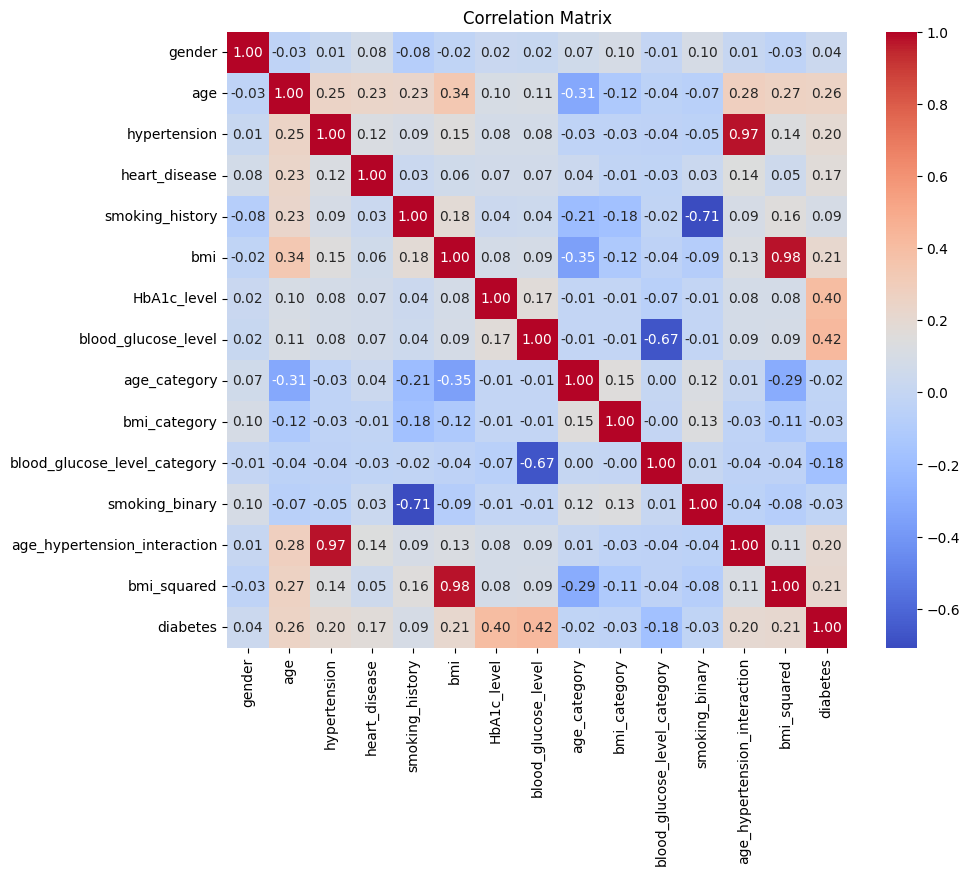

In [ ]:
correlation_matrix = df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# **SPLITING OF DATASET**

In [ ]:
X = df.drop(columns=['diabetes'])
y = df['diabetes']

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Normalize the features (X)
X_normalized = scaler.fit_transform(X)

# Convert the normalized features back to a DataFrame
X_normalized_df = pd.DataFrame(X_normalized, columns=X.columns)


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (80000, 14)
X_test shape: (20000, 14)
y_train shape: (80000,)
y_test shape: (20000,)


# **APPLYING LOGISTIC REGRESSION**

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression classifier
classifier = LogisticRegression()

# Create StratifiedKFold object for cross-validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(classifier, X_train, y_train, cv=kfold, scoring='accuracy')

# Display the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", cv_scores.mean())


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Cross-validation scores: [0.959625 0.962125 0.9625   0.96025  0.958875]
Mean accuracy: 0.960675


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import classification_report

# Fit logistic regression model on the entire training data
classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = classifier.predict(X_test)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     18292
           1       0.87      0.60      0.71      1708

    accuracy                           0.96     20000
   macro avg       0.92      0.80      0.85     20000
weighted avg       0.96      0.96      0.96     20000



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


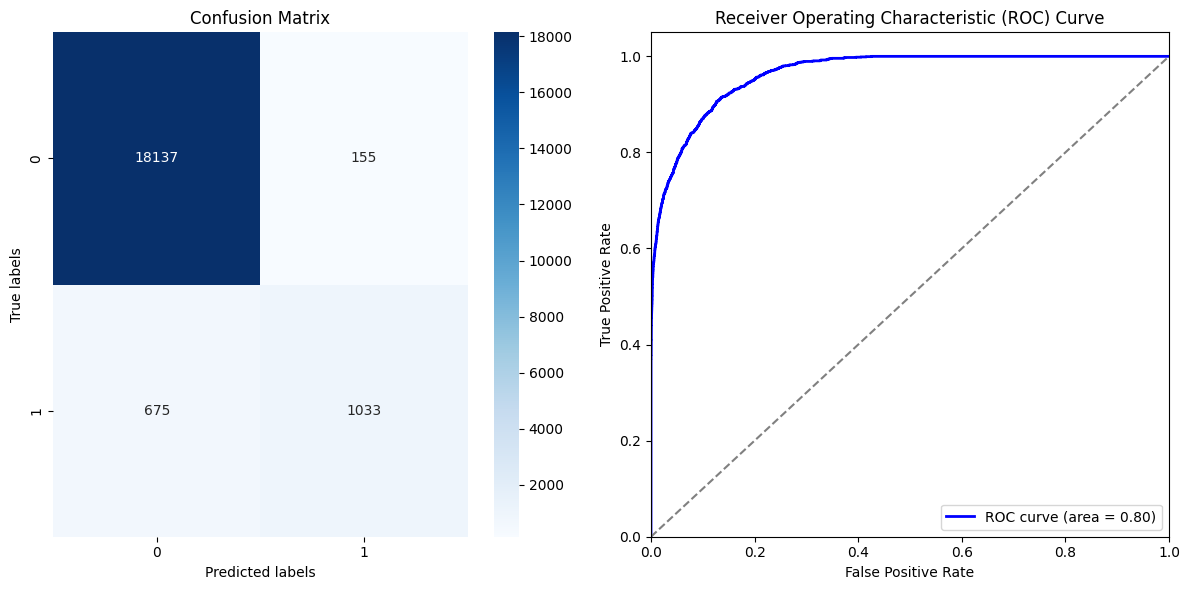

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate ROC curve and ROC AUC
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:, 1])
roc_auc = roc_auc_score(y_test, y_pred)

# Plot confusion matrix and ROC curve horizontally
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', ax=axes[0])
axes[0].set_xlabel('Predicted labels')
axes[0].set_ylabel('True labels')
axes[0].set_title('Confusion Matrix')

# Plot ROC curve
axes[1].plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
axes[1].plot([0, 1], [0, 1], color='gray', linestyle='--')
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('Receiver Operating Characteristic (ROC) Curve')
axes[1].legend(loc="lower right")

plt.tight_layout()
plt.show()


# **APPLYING RANDOM FOREST**

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
classifier = RandomForestClassifier()

# Create StratifiedKFold object for cross-validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(classifier, X_train, y_train, cv=kfold, scoring='accuracy')

# Display the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", cv_scores.mean())


Cross-validation scores: [0.9689375 0.97      0.9714375 0.969625  0.9703125]
Mean accuracy: 0.9700625


In [ ]:
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
classifier = RandomForestClassifier()

# Fit the Random Forest model on the entire training data
classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = classifier.predict(X_test)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18292
           1       0.96      0.69      0.80      1708

    accuracy                           0.97     20000
   macro avg       0.96      0.84      0.89     20000
weighted avg       0.97      0.97      0.97     20000



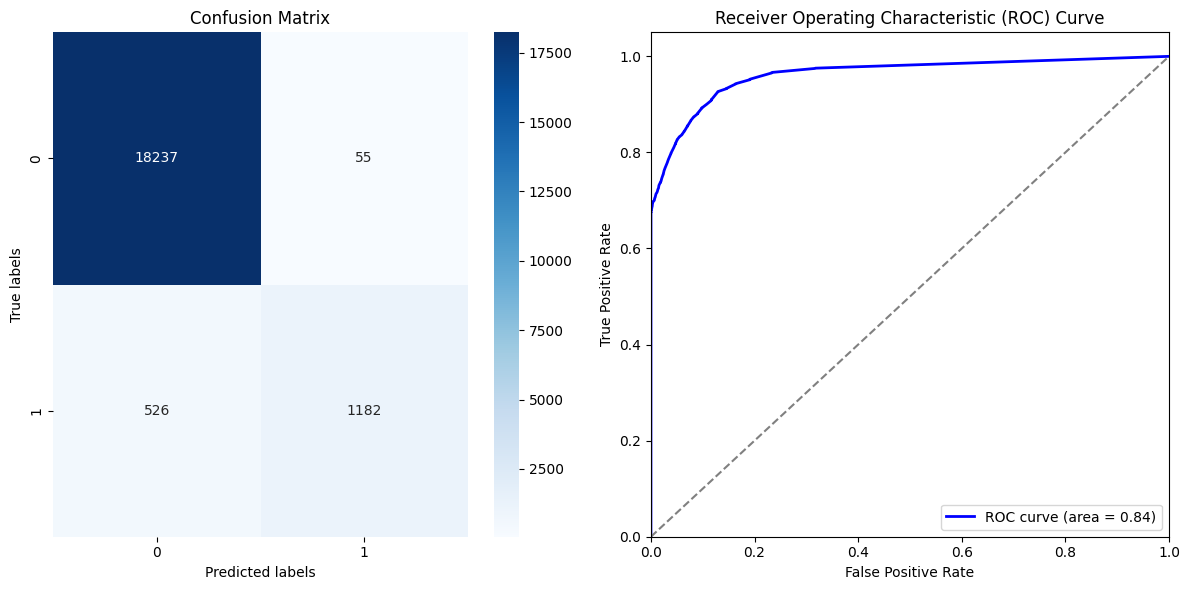

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate ROC curve and ROC AUC
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:, 1])
roc_auc = roc_auc_score(y_test, y_pred)

# Plot confusion matrix and ROC curve horizontally
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', ax=axes[0])
axes[0].set_xlabel('Predicted labels')
axes[0].set_ylabel('True labels')
axes[0].set_title('Confusion Matrix')

# Plot ROC curve
axes[1].plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
axes[1].plot([0, 1], [0, 1], color='gray', linestyle='--')
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('Receiver Operating Characteristic (ROC) Curve')
axes[1].legend(loc="lower right")

plt.tight_layout()
plt.show()


# **APPLYING SVM**

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.svm import SVC

# Create an SVM classifier
classifier = SVC()

# Create StratifiedKFold object for cross-validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(classifier, X_train, y_train, cv=kfold, scoring='accuracy')

# Display the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", cv_scores.mean())


Cross-validation scores: [0.9613125 0.9640625 0.9631875 0.961625  0.963    ]
Mean accuracy: 0.9626374999999999


In [ ]:
from sklearn.metrics import classification_report
from sklearn.svm import SVC

# Create an SVM classifier
classifier = SVC()

# Fit the SVM model on the entire training data
classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = classifier.predict(X_test)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     18292
           1       0.97      0.56      0.71      1708

    accuracy                           0.96     20000
   macro avg       0.97      0.78      0.85     20000
weighted avg       0.96      0.96      0.96     20000



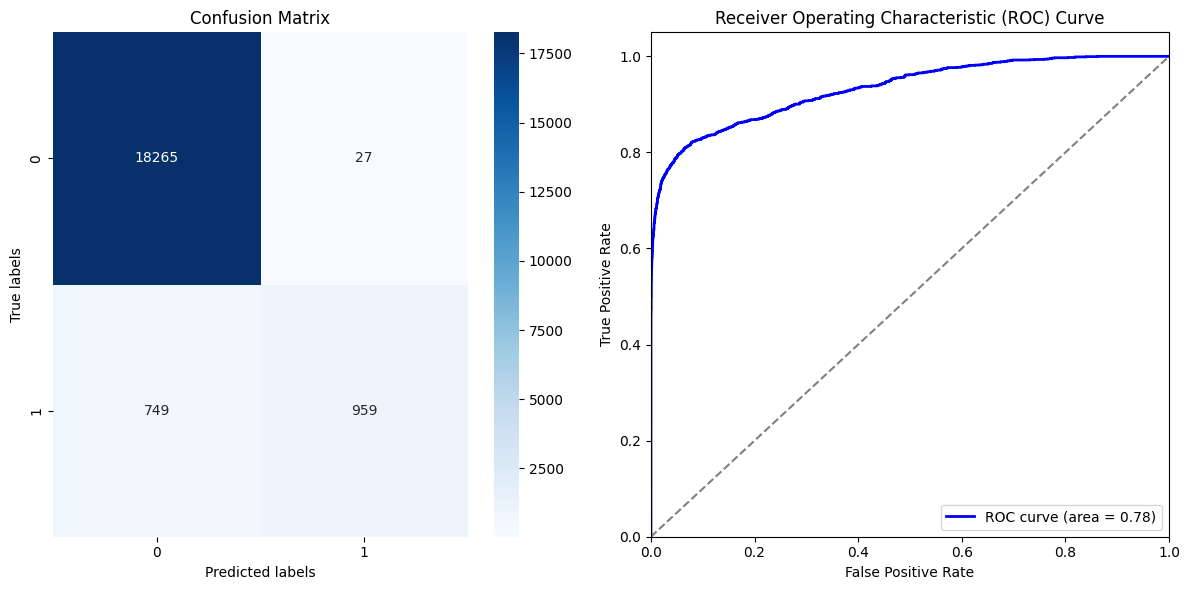

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate decision function scores
decision_scores = classifier.decision_function(X_test)

# Calculate ROC curve and ROC AUC
fpr, tpr, thresholds = roc_curve(y_test, decision_scores)
roc_auc = roc_auc_score(y_test, y_pred)

# Plot confusion matrix and ROC curve horizontally
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', ax=axes[0])
axes[0].set_xlabel('Predicted labels')
axes[0].set_ylabel('True labels')
axes[0].set_title('Confusion Matrix')

# Plot ROC curve
axes[1].plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
axes[1].plot([0, 1], [0, 1], color='gray', linestyle='--')
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('Receiver Operating Characteristic (ROC) Curve')
axes[1].legend(loc="lower right")

plt.tight_layout()
plt.show()


# **Appendix**

## **Libraries Used:**

*   pandas: Used for data manipulation and analysis.
*   matplotlib.pyplot: Used for creating visualizations such as plots and graphs.
*  seaborn: Built on top of matplotlib, seaborn is used for statistical data visualization.
*   sklearn.preprocessing.LabelEncoder: Used for encoding categorical features.
sklearn.model_selection.train_test_split: Used for splitting data into training and testing sets.
*   sklearn.preprocessing.MinMaxScaler: Used for feature scaling.
*   sklearn.model_selection.cross_val_score: Used for cross-validation.
*   sklearn.model_selection.StratifiedKFold: Used for stratified k-fold cross-validation.
*   sklearn.linear_model.LogisticRegression: Used for logistic regression classification.
*   sklearn.metrics.classification_report: Used for generating a classification report.
*   sklearn.metrics.confusion_matrix: Used for generating a confusion matrix.
*   sklearn.metrics.roc_curve: Used for plotting the ROC curve.
*   sklearn.metrics.roc_auc_score: Used for calculating the ROC AUC score.
*   sklearn.ensemble.RandomForestClassifier: Used for random forest classification.
*   sklearn.svm.SVC: Used for support vector classification.

## **Data Handling:**



*   Loaded the dataset from a CSV file using pd.read_csv.
*   Displayed the descriptive statistics of the dataset using df.describe().
*   Encoded categorical features using LabelEncoder.
*   Normalized features using MinMaxScaler.
*   Split the dataset into training and testing sets using train_test_split




## **Model Building and Evaluation:**

*   Utilized logistic regression, random forest classifier, and support vector classifier for classification tasks.
*   Evaluated models using cross-validation to ensure robustness.
*   Generated classification reports including precision, recall, and F1-score.
*   Plotted confusion matrices to visualize model performance.
*   Plotted ROC curves and calculated ROC AUC scores to evaluate model performance further.



## **Visualization:**



* Visualized box plots to understand the relationship between features and the target variable.
* Visualized histograms to understand the distribution of features in the dataset.
* Visualized the correlation matrix as a heatmap to understand the correlation between features.

## **Notes:**


*   The code assumes that the dataset is stored in a CSV file named "diabetes_dataset.csv" and is located at the specified path ("/content/diabetes_dataset.csv").
*   It's essential to adapt the code if the dataset file path or column names differ.

